In [1]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [2]:
data_df = pd.read_excel(io='Water Maze Data.Spring2018.xls', sheet='Sheet1')
data_df = data_df.drop('Unnamed: 7',axis=1)
data_df = data_df.drop([0,7,8,9,14,15,16])
data_df.columns = ['Escape Latency by Day/Probe Trial Quadrant/Annulus Crossings', 'Saline', 'Saline-SEM', 'Atropine', 'Atropine-SEM', 'MK-801', 'MK-801-SEM']
data_df = data_df.reset_index(drop=True)
data_df.iat[10,0] = 'Crossings'

In [3]:
data_df

,Escape Latency by Day/Probe Trial Quadrant/Annulus Crossings,Saline,Saline-SEM,Atropine,Atropine-SEM,MK-801,MK-801-SEM
0,1,50.3855,9.9275,48.6585,7.5625,57.8215,11.9845
1,2,30.6295,7.8265,36.883,9.988,38.258,6.3415
2,3,10.8625,7.029,29.216,5.247,37.246,5.7035
3,4,6.4955,3.553,18.8705,4.719,18.6615,3.773
4,5,5.5,1.947,20.0365,3.432,15.675,2.9755
5,6,5.72,1.166,14.0415,2.0075,15.642,1.177
6,NE,13.75,2.56,16.25,3.13,16.63,2.96
7,NW,7.37,1.83,14.5,1.56,13.75,1.15
8,SE,28,5.52,16.37,4.71,17.37,1.84
9,SW,10.88,3.78,13.13,2.84,12.75,1.69


In [4]:
conditions = [i for i in data_df.columns.values[1:] if data_df.columns.values.tolist().index(i)%2==1]

# escape latencies

In [5]:
days = data_df.iloc[0:6,0].values.tolist()

In [6]:
saline_esc_lats = data_df.loc[:,'Saline'][0:6].tolist()
atropine_esc_lats = data_df.loc[:,'Atropine'][0:6].tolist()
mk801_esc_lats = data_df.loc[:,'MK-801'][0:6].tolist()
all_lats = [saline_esc_lats, atropine_esc_lats,mk801_esc_lats]
esc_lats_df = pd.DataFrame({'Day': days*3, 'Escape Latency': list(itertools.chain.from_iterable(all_lats)), 
                           'Treatment': list(itertools.chain.from_iterable([[i]*6 for i in conditions]))})
saline_esc_SEMs = data_df.loc[:,'Saline-SEM'][0:6].tolist()
atropine_esc_SEMs = data_df.loc[:,'Atropine-SEM'][0:6].tolist()
mk801_esc_SEMs = data_df.loc[:,'MK-801-SEM'][0:6].tolist()

In [7]:
esc_lats_df

,Day,Escape Latency,Treatment
0,1,50.3855,Saline
1,2,30.6295,Saline
2,3,10.8625,Saline
3,4,6.4955,Saline
4,5,5.5000,Saline
5,6,5.7200,Saline
6,1,48.6585,Atropine
7,2,36.8830,Atropine
8,3,29.2160,Atropine
9,4,18.8705,Atropine


Text(0.5,1,'Average escape latencies by day, by treatment')

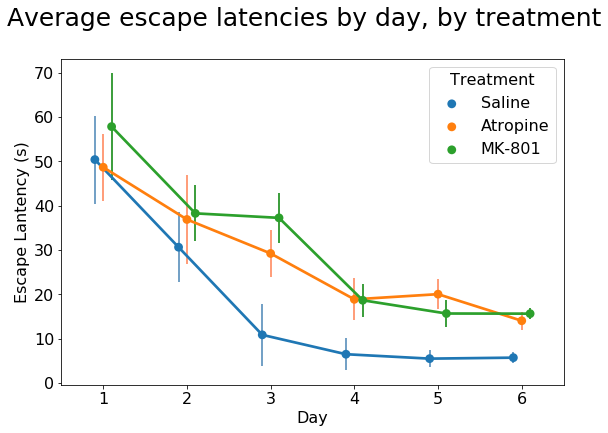

In [8]:
plt.rcParams.update({'font.size':16})

ax = plot = sns.pointplot('Day', 'Escape Latency', 'Treatment', esc_lats_df, dodge=0.2)
x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)
        
errors = list(itertools.chain.from_iterable([saline_esc_SEMs]+[atropine_esc_SEMs]+[mk801_esc_SEMs]))
colors = ['steelblue']*6 + ['coral']*6 + ['green']*6

ax.errorbar(x_coords, y_coords, yerr=errors, ecolor=colors, fmt=' ', zorder=-1)
ax.set_ylabel('Escape Lantency (s)')
fig = ax.get_figure()
fig.set_size_inches(9,6)

fig.suptitle('Average escape latencies by day, by treatment', y=1, fontsize=25)
#fig.savefig('escape-latencies.pdf')

# probe trial quadrant times

In [9]:
saline_quads = data_df.loc[6:9,'Saline'].tolist()
atropine_quads = data_df.loc[6:9,'Atropine'].tolist()
mk801_quads = data_df.loc[6:9,'MK-801'].tolist()

saline_quad_SEMs = data_df.loc[6:9,'Saline-SEM'].tolist()
atropine_quad_SEMs = data_df.loc[6:9,'Atropine-SEM'].tolist()
mk801_quad_SEMs = data_df.loc[6:9,'MK-801-SEM'].tolist()

all_treatment_quads = saline_quads+atropine_quads+mk801_quads
all_treatment_quad_SEMs = saline_quad_SEMs+atropine_quad_SEMs+mk801_quad_SEMs

quads = ['NE','NW','SE','SW']

In [10]:
quads_df = pd.DataFrame({'Times': all_treatment_quads, 'Quadrant': quads*3, 'Treatment': list(itertools.chain.from_iterable([[i]*4 for i in conditions]))})

In [11]:
quads_df

,Quadrant,Times,Treatment
0,NE,13.75,Saline
1,NW,7.37,Saline
2,SE,28.00,Saline
3,SW,10.88,Saline
4,NE,16.25,Atropine
5,NW,14.50,Atropine
6,SE,16.37,Atropine
7,SW,13.13,Atropine
8,NE,16.63,MK-801
9,NW,13.75,MK-801


Text(0.5,1,'Average time spent in each quadrant, by treatment')

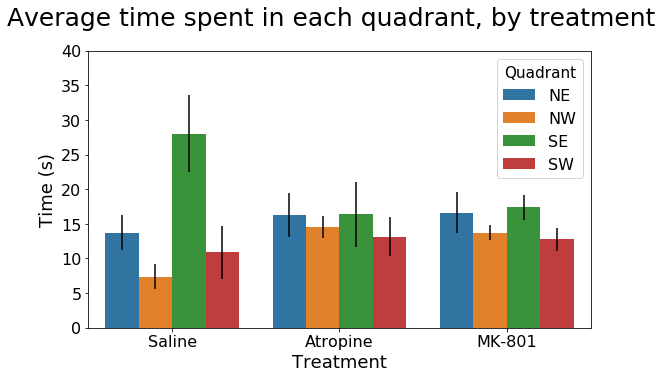

In [12]:
plt.rcParams.update({'font.size':16})
plt.rcParams['axes.labelsize']=18
ax = sns.barplot('Treatment', 'Times', hue='Quadrant', data=quads_df)

xcoords = [-.3,-.1,.1,.3,.7,.9,1.1,1.3,1.7,1.9,2.1,2.3]
errlist = all_treatment_quad_SEMs
ax.errorbar(xcoords, all_treatment_quads, yerr=errlist, ecolor='black', fmt=' ', zorder=10)

ax.set_ylabel('Time (s)')
ax.set_ylim(0,40)
fig = ax.get_figure()
fig.set_size_inches(9,5.1)
fig.suptitle('Average time spent in each quadrant, by treatment', y=1, fontsize=25)
#fig.savefig('quadrant-times.pdf')

In [12]:
# treatment_quadrant_times={}
# for condition in range(3):
#     for quadrant in range(4):
#         treatment_quadrant_times[str(conditions[condition])+'_'+str(quads[quadrent])] = all_treatment_quads[condition][quadrant]

In [20]:
# treatment_quadrant_SEMs={}
# for condition in range(3):
#     for quadrant in range(4):
#         treatment_quadrant_SEMs[str(conditions[condition])+'_'+str(quads[quadrent])] = all_treatment_quad_SEMs[condition][quadrant]

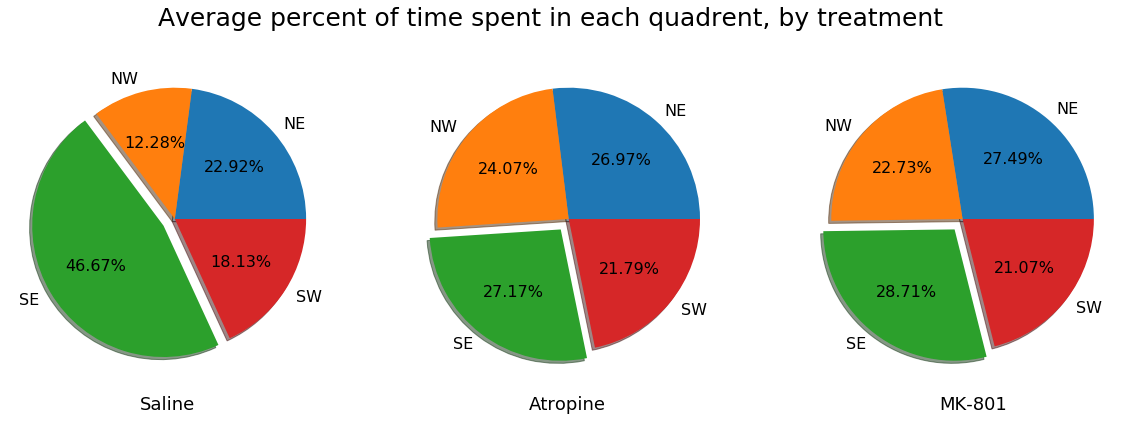

In [119]:
# layout = plt.gridspec.GridSpec(1,3)
# fig = plt.pyplot.gcf()
# fig.suptitle('Average percent of time spent in each quadrant, by treatment', y=0.65, fontsize=25)
# plt.pyplot.figtext(.215,.37,'Saline', fontsize=18)
# plt.pyplot.figtext(.485,.37,'Atropine', fontsize=18)
# plt.pyplot.figtext(.77,.37,'MK-801', fontsize=18)
# fig.set_size_inches(20,20)
# plt.rcParams.update({'font.size':16})
# explode = (0,0,0.1,0)
# plt.pyplot.subplot(layout[0,0], aspect=1)
# plt.pyplot.pie([treatment_quadrant_percentages.get('Saline_'+i) for i in quads], explode=explode, labels=quads, autopct='%1.2f%%', shadow=True)
# plt.pyplot.subplot(layout[0,1], aspect=1)
# plt.pyplot.pie([treatment_quadrant_percentages.get('Atropine_'+i) for i in quads], explode=explode, labels=quads, autopct='%1.2f%%', shadow=True)
# plt.pyplot.subplot(layout[0,2], aspect=1)
# plt.pyplot.pie([treatment_quadrant_percentages.get('MK-801_'+i) for i in quads], explode=explode, labels=quads, autopct='%1.2f%%', shadow=True)

# fig.savefig('quadrant-time-percentages.pdf')

# annulus crossings by group

In [13]:
crossings = [data_df.loc[10,i] for i in conditions]
crossings_df = pd.DataFrame({'Crossings': crossings, 'Treatment': conditions})
crossings_SEMs = [data_df.iloc[10,i] for i in [2,4,6]]

Text(0.5,1,'Average annulus crossings by treatment')

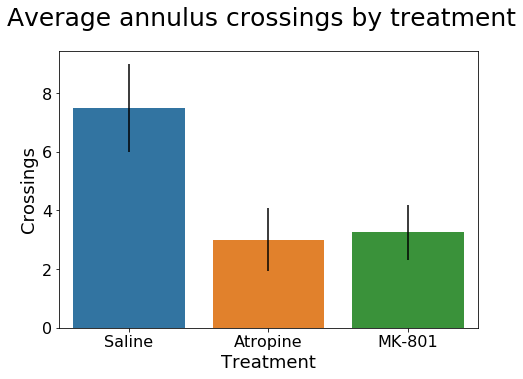

In [14]:
plt.rcParams.update({'font.size':16})
plt.rcParams['axes.labelsize']=18
ax = sns.barplot('Treatment', 'Crossings', data=crossings_df)
ax.errorbar(['Saline','Atropine','MK-801'], crossings, yerr=crossings_SEMs, ecolor='black', fmt=' ', zorder=10)
fig = ax.get_figure()
fig.set_size_inches(7.5,5.1)
fig.suptitle('Average annulus crossings by treatment', y=1, fontsize=25)
#fig.savefig('annulus-crossings.pdf')